In [126]:
import pandas as pd
from os.path import exists

In [127]:
df = pd.read_csv("DATASET/B/train.csv")

In [128]:
for i, row in df.iterrows():
    if exists("DATASET/B/B/data/"+row["image_path"]) == False:
        df = df.drop(i)
    

In [129]:
df.reset_index
df.pop("Unnamed: 0")

0        8140
1       11389
3        7981
8         173
10       7942
        ...  
9447     4008
9448     6401
9449    12515
9450    11683
9456     9697
Name: Unnamed: 0, Length: 5282, dtype: int64

In [130]:
df

,image_path,Taca oli,Carrera,Agujero,Hilo fino horizontal2,Tensión horizontal,Barrado,Borrissol,Hilo fino horizontal,Punto escapado
0,4aaf06a9-frame0-00-08.95.jpg,0,0,0,1,0,0,0,0,0
1,19c8888a-frame0-00-15.68.jpg,0,0,0,0,0,0,0,0,0
3,5e93a55a-frame0-00-12.03.jpg,0,0,0,1,0,0,0,0,0
8,47b8fa6d-frame0-00-20.79.jpg,0,0,0,0,0,0,0,0,0
10,6787b1aa-frame0-00-13.24.jpg,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9447,465d9bce-frame0-00-32.28.jpg,0,0,0,0,0,0,0,0,0
9448,2efd8409-frame0-00-11.38.jpg,0,0,0,0,0,0,0,1,0
9449,6bc3fdda-frame0-00-01.45.jpg,0,0,0,0,0,0,0,0,0
9450,6efef5e7-frame0-00-09.95.jpg,0,0,0,0,0,0,0,0,0


In [131]:
df.to_csv("verd_df_clean.csv")

---

In [132]:
import tensorflow as tf
import cv2
from tensorflow import keras
import numpy as np

In [240]:
def create_dataset(df):
    def apply():
        for i, row in df.iterrows():
            img = cv2.cvtColor(cv2.imread("DATASET/B/B/data/"+row["image_path"]), cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (224,224)) 
            yield (img.reshape((224,224,1)) ,np.array(row)[1:].reshape(1, 9))
    return apply

In [242]:
next(create_dataset(df)())[0].shape

(224, 224)

In [254]:
imgs = []
labels = []
for i, row in df.iterrows():
    img = cv2.cvtColor(cv2.imread("DATASET/B/B/data/"+row["image_path"]), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224))
    img = img/img.max()
    labels.append(np.array(row)[1:])
    imgs.append(img)
    if(i > 500):
        break

imgs = np.array(imgs)
labels = np.matrix(labels)

In [244]:
print(type(labels))
print(labels.shape)
print(labels)


<class 'numpy.matrix'>
(282, 9)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [245]:
print(type(imgs))
print(imgs.shape)
print(imgs)

<class 'numpy.ndarray'>
(282, 224, 224)
[[[0.24545455 0.22272727 0.24090909 ... 0.28181818 0.15909091 0.25      ]
  [0.27272727 0.21818182 0.27272727 ... 0.28181818 0.15909091 0.25      ]
  [0.21363636 0.11818182 0.31818182 ... 0.28636364 0.21363636 0.24090909]
  ...
  [0.34090909 0.2        0.18181818 ... 0.13181818 0.16818182 0.10454545]
  [0.22272727 0.16818182 0.14545455 ... 0.08636364 0.18636364 0.06363636]
  [0.27727273 0.21363636 0.15909091 ... 0.07272727 0.21818182 0.05      ]]

 [[0.22395833 0.16145833 0.22916667 ... 0.22395833 0.265625   0.22916667]
  [0.17708333 0.13020833 0.19270833 ... 0.25       0.265625   0.21875   ]
  [0.19270833 0.16145833 0.19270833 ... 0.34895833 0.19791667 0.28645833]
  ...
  [0.30729167 0.15625    0.20833333 ... 0.109375   0.203125   0.        ]
  [0.23958333 0.13541667 0.13541667 ... 0.15104167 0.22916667 0.02604167]
  [0.28125    0.26041667 0.25       ... 0.203125   0.21354167 0.03645833]]

 [[0.31050228 0.21461187 0.2283105  ... 0.21461187 0.237

In [259]:
tf_df = tf.data.Dataset.from_generator(create_dataset(df),output_signature=(
         tf.TensorSpec(shape=(224,224), dtype=tf.float32),
         tf.RaggedTensorSpec(shape=(9,), dtype=tf.float32)))

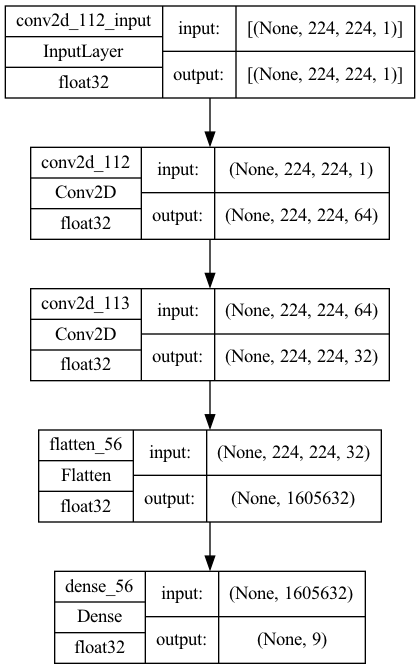

In [267]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding="same", input_shape=(224, 224,1)),
    keras.layers.Conv2D(32, 3, activation='relu',padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(9, activation='softmax')
])
 
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.Poisson(),
              metrics=['accuracy'])

# Fitting the model with data
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [251]:
img, label = next(create_dataset(df)())
print(img.shape)
model(img.reshape(1, 224, 224))

(224, 224)


<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[6.3179158e-15, 4.2350334e-01, 2.5104582e-02, 1.6212476e-04,
        5.6524621e-03, 6.1819548e-05, 5.4550725e-01, 8.9432940e-12,
        8.4249023e-06]], dtype=float32)>

In [260]:
model.fit(, epochs=5,batch_size=2)

Epoch 1/5


ValueError: in user code:

    File "/Users/josepsmachine/miniforge3/envs/chaos/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/josepsmachine/miniforge3/envs/chaos/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/josepsmachine/miniforge3/envs/chaos/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/josepsmachine/miniforge3/envs/chaos/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/josepsmachine/miniforge3/envs/chaos/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/josepsmachine/miniforge3/envs/chaos/lib/python3.10/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_50" "                 f"(type Sequential).
    
    Input 0 of layer "conv2d_100" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (224, 224)
    
    Call arguments received by layer "sequential_50" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(224, 224), dtype=float32)
      • training=True
      • mask=None


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('DATASET/B/B/data')

Found 0 files belonging to 0 classes.


ValueError: No images found in directory DATASET/B/B/data. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')